In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


## Set model and resolution parameters

In [2]:
train_mu0 = 0.
train_mu1 = 1.
train_rho01 = -0.6

train_sig0 = 1.0
train_sig1 = 1.5

train_cov00 = train_sig0 * train_sig0 
train_cov11 = train_sig1 * train_sig1
train_cov01 = train_rho01 * train_sig0 * train_sig1

train_cov = np.array( [[train_cov00, train_cov01], [train_cov01, train_cov11]] )
train_mu = np.array( [train_mu0, train_mu1])



true_mu0 = 0.2
true_mu1 = 0.8
true_rho01 = -0.6

true_sig0 = 0.9
true_sig1 = 1.3

true_cov00 = true_sig0 * true_sig0 
true_cov11 = true_sig1 * true_sig1
true_cov01 = true_rho01 * true_sig0 * true_sig1

true_cov = np.array( [[true_cov00, true_cov01], [true_cov01, true_cov11]] )
true_mu = np.array( [true_mu0, true_mu1])



#--- resolution is in same dimensions as features (not sigma/val)
res0 = 0.5
res1 = 0.8




## Plots to visualize these parameter choices

In [3]:
#ngen = 100000
ngen = 400000

train_pts = np.random.multivariate_normal(train_mu, train_cov, size=ngen)
true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen)

train_det_pts = np.random.normal( train_pts, [res0, res1])

true_det_pts = np.random.normal( true_pts, [res0, res1])



<function matplotlib.pyplot.show(close=None, block=None)>

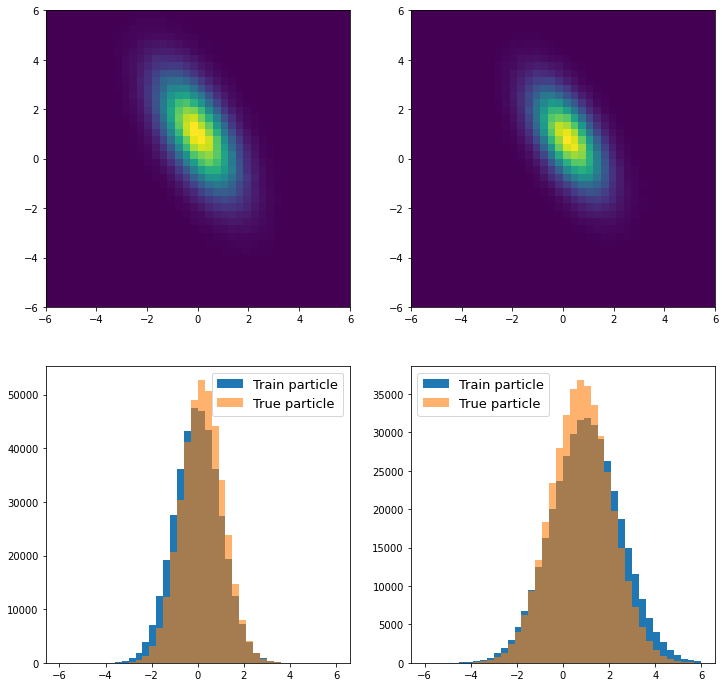

In [4]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

In [5]:
train_diff = train_det_pts - train_pts

In [6]:
diff_cov = np.cov( train_diff.T )

In [7]:
diff_cov

array([[2.49668861e-01, 4.52430559e-04],
       [4.52430559e-04, 6.39919477e-01]])

In [8]:
np.sqrt(diff_cov[0,0])

0.4996687510698612

In [9]:
np.sqrt(diff_cov[1,1])

0.7999496715248718

<function matplotlib.pyplot.show(close=None, block=None)>

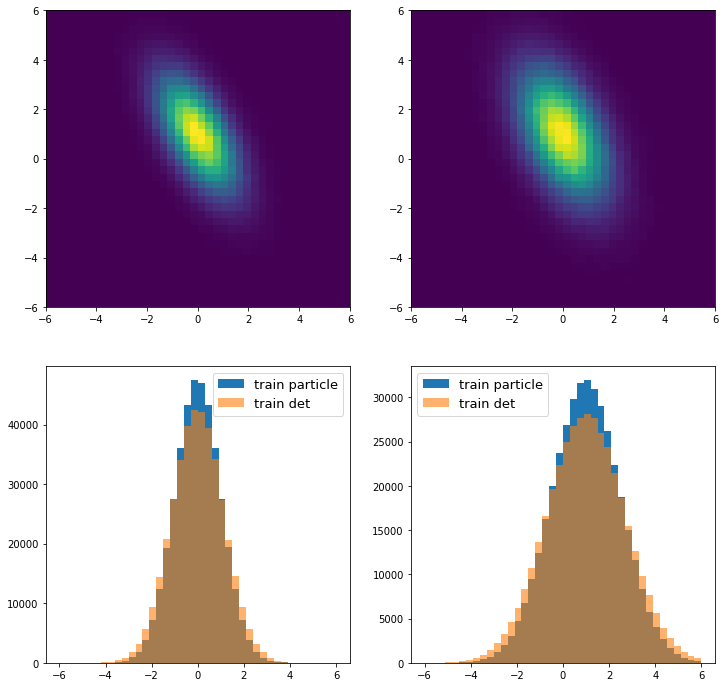

In [10]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

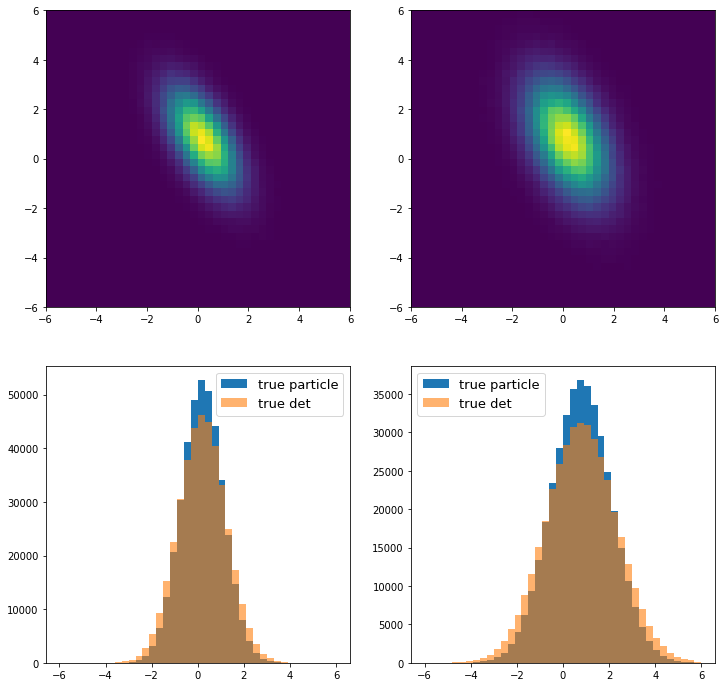

In [11]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)

ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

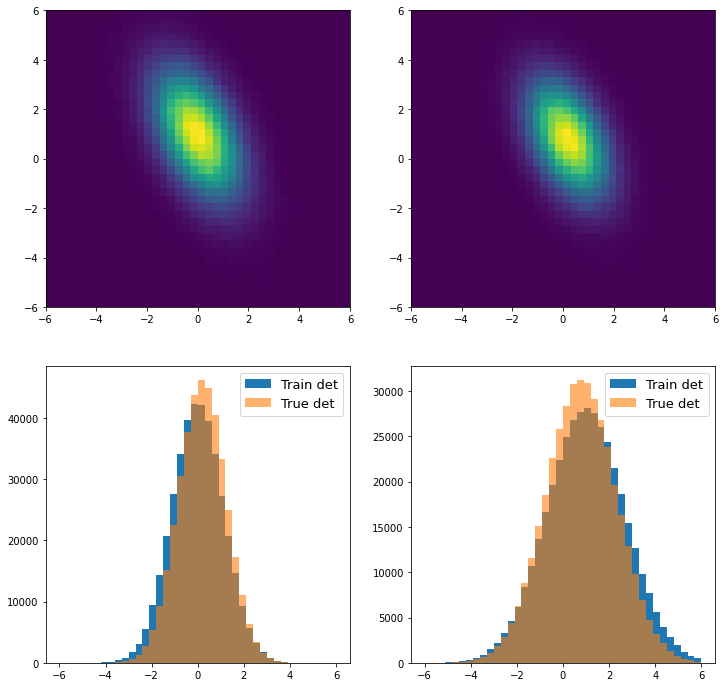

In [12]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)

ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

## Set up NN model for OmniFold

In [13]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

## Package the training data for OmniFold

In [14]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

## Run OmniFold

In [15]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)


ITERATION: 1

   -- ITERATION 1  STEP 1



/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Epoch 1/20
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
60/60 [==============================] - 13s 12ms/step - loss: 0.6890 - accuracy: 0.5010 - val_loss: 0.6857 - val_accuracy: 0.5887
Epoch 2/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6850 - accuracy: 0.5777 - val_loss: 0.6854 - val_accuracy: 0.5686
Epoch 3/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6851 - accuracy: 0.5805 - val_loss: 0.6853 - val_accuracy: 0.5728
Epoch 4/20
60/60 [==============================] - 0s 7ms/step - loss: 0.6851 - accuracy: 0.5816 - val_loss: 0.6853 - val_accuracy: 0.5834
Epoch 5/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6848 - accuracy: 0.5833 - val_loss: 0.6852 - val_accuracy: 0.5773
Epoch 6/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.5818 - val_loss: 0.6853 - val_accuracy: 0.5618
Epoch 7/20
60/60 [==

Epoch 16/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.4279 - val_loss: 0.6947 - val_accuracy: 0.4176
Epoch 17/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.4165 - val_loss: 0.6948 - val_accuracy: 0.4339
Epoch 18/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.4262 - val_loss: 0.6948 - val_accuracy: 0.4278
Epoch 19/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6951 - accuracy: 0.4205 - val_loss: 0.6947 - val_accuracy: 0.4256
Epoch 20/20
60/60 [==============================] - 1s 10ms/step - loss: 0.6949 - accuracy: 0.4249 - val_loss: 0.6947 - val_accuracy: 0.4283

   -- ITERATION 2  STEP 2

Epoch 1/20
300/300 [==============================] - 2s 3ms/step - loss: 0.6866 - accuracy: 0.3895 - val_loss: 0.6857 - val_accuracy: 0.3906
Epoch 2/20
300/300 [==============================] - 1s 2ms/step - loss: 0.6858 - accuracy: 0.3920 - val_loss: 0.6858 - val

300/300 [==============================] - 1s 2ms/step - loss: 0.6813 - accuracy: 0.3860 - val_loss: 0.6810 - val_accuracy: 0.3844
Epoch 14/20
300/300 [==============================] - 1s 2ms/step - loss: 0.6812 - accuracy: 0.3856 - val_loss: 0.6810 - val_accuracy: 0.3851
Epoch 15/20
300/300 [==============================] - 1s 2ms/step - loss: 0.6811 - accuracy: 0.3864 - val_loss: 0.6810 - val_accuracy: 0.3836
Epoch 16/20
300/300 [==============================] - 1s 2ms/step - loss: 0.6811 - accuracy: 0.3848 - val_loss: 0.6811 - val_accuracy: 0.3899
Epoch 17/20
300/300 [==============================] - 1s 2ms/step - loss: 0.6812 - accuracy: 0.3875 - val_loss: 0.6810 - val_accuracy: 0.3864
Epoch 18/20
300/300 [==============================] - 1s 2ms/step - loss: 0.6815 - accuracy: 0.3875 - val_loss: 0.6811 - val_accuracy: 0.3868
Epoch 19/20
300/300 [==============================] - 1s 2ms/step - loss: 0.6813 - accuracy: 0.3870 - val_loss: 0.6812 - val_accuracy: 0.3885
Epoch 20/20

In [16]:
of_weights

array([[[0.9092018 , 0.8695997 , 0.92782998, ..., 0.98764336,
         1.07272363, 1.04147363],
        [0.88758457, 0.89719886, 0.81547827, ..., 1.15929317,
         1.05713606, 1.11136699]],

       [[0.88820142, 0.88785034, 0.77570051, ..., 1.10150838,
         1.07211971, 1.07478154],
        [0.88082111, 0.90608788, 0.75149608, ..., 1.20981097,
         1.09447813, 1.13457322]],

       [[0.88673639, 0.90614295, 0.7409091 , ..., 1.18623185,
         1.0595485 , 1.0678612 ],
        [0.84134036, 0.8827095 , 0.6806584 , ..., 1.18994141,
         1.06989992, 1.08224857]],

       [[0.89528447, 0.94024038, 0.71306902, ..., 1.22848117,
         1.08226299, 1.10147405],
        [0.89171839, 0.91818643, 0.71386456, ..., 1.25776064,
         1.06928957, 1.07247913]]])

In [17]:
np.shape( of_weights)

(4, 2, 400000)

<function matplotlib.pyplot.show(close=None, block=None)>

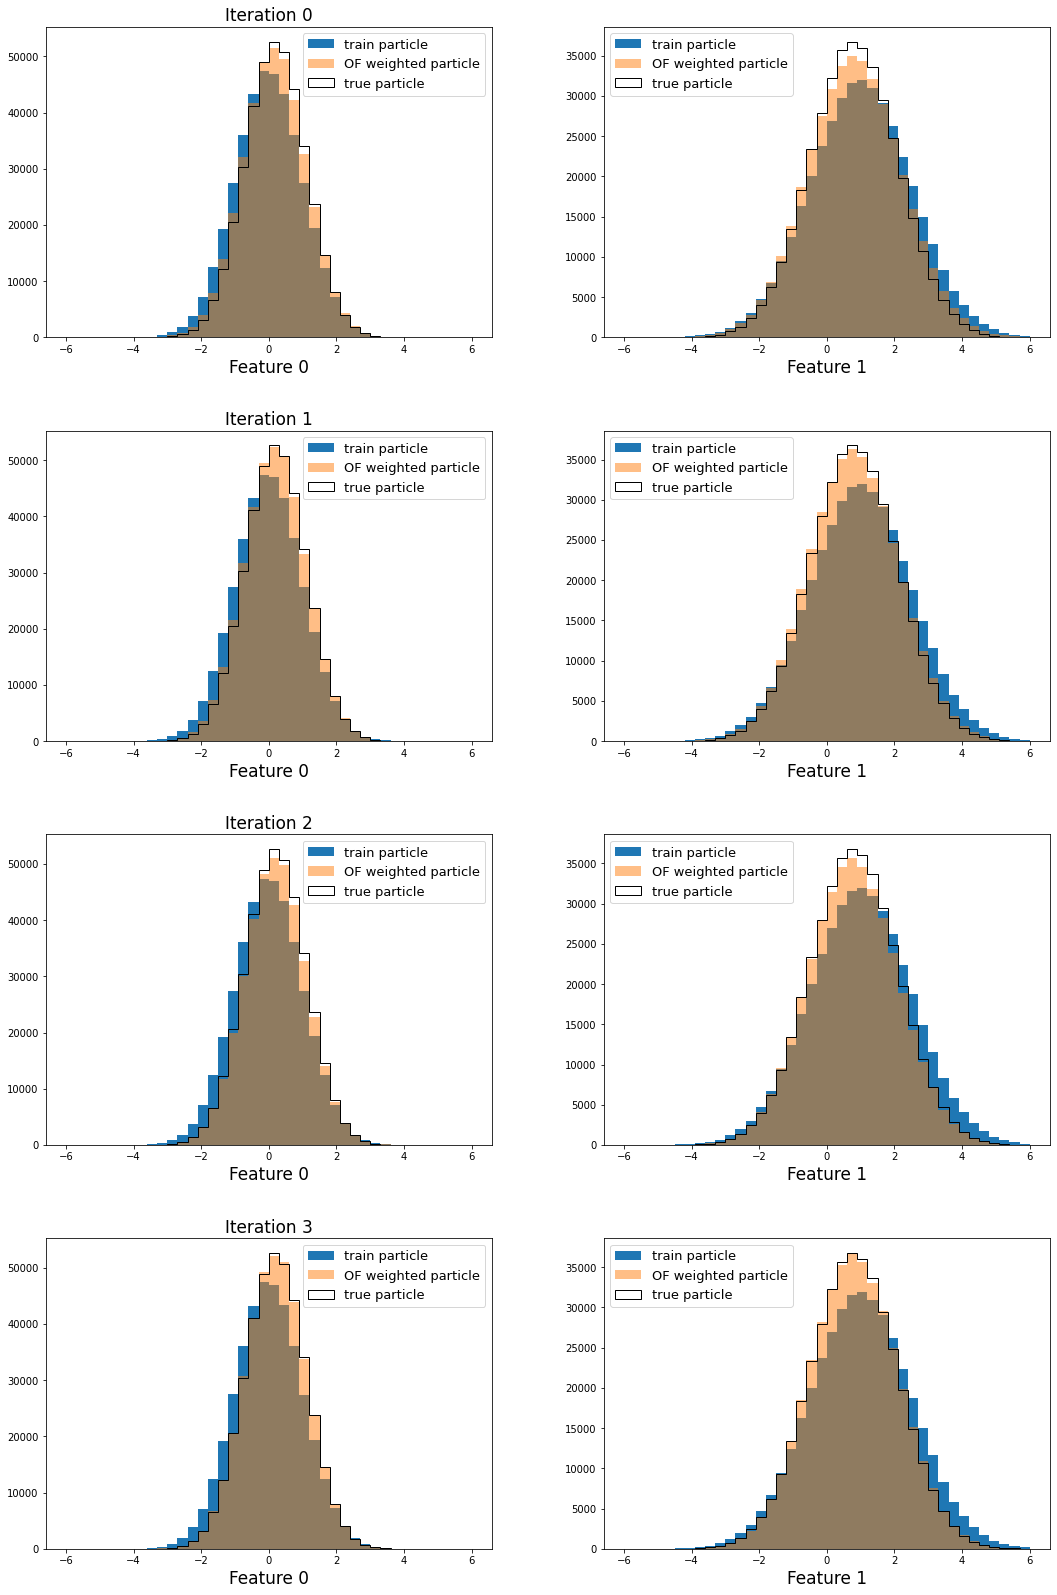

In [46]:


fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)
    
    
    ax[ofi][0].set_xlabel('Feature 0', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel('Feature 1', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

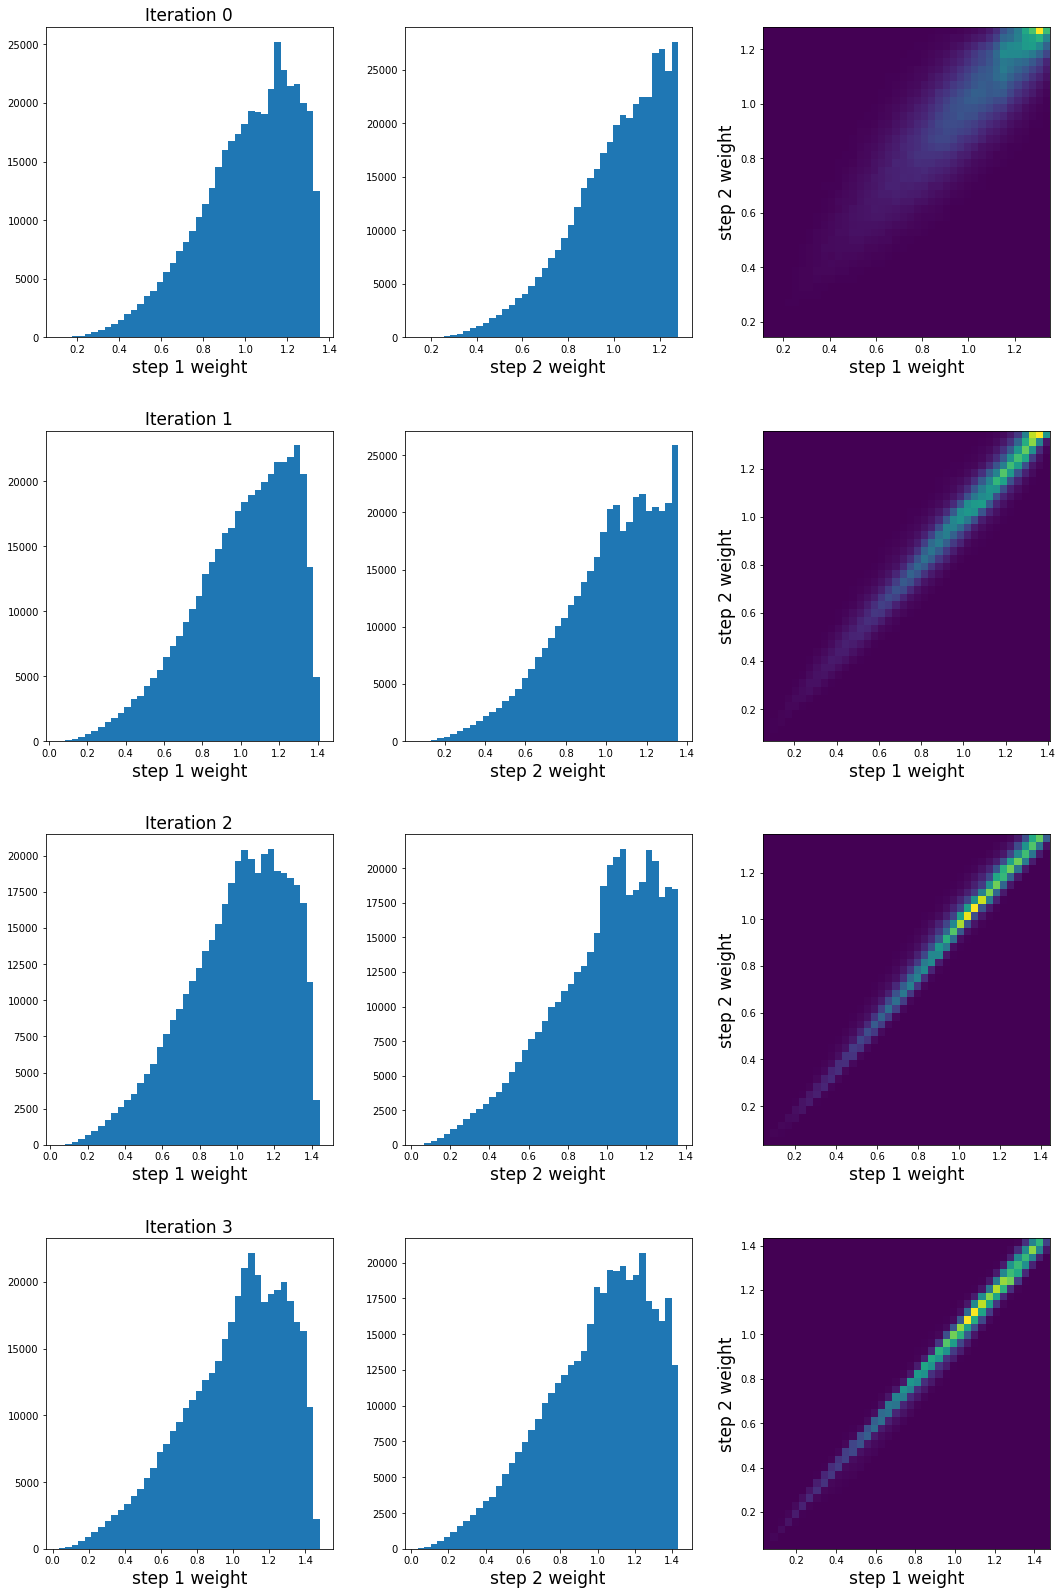

In [41]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist( of_weights[ofi,0,:], bins=hbins )
    ax[ofi][1].hist( of_weights[ofi,1,:], bins=hbins )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

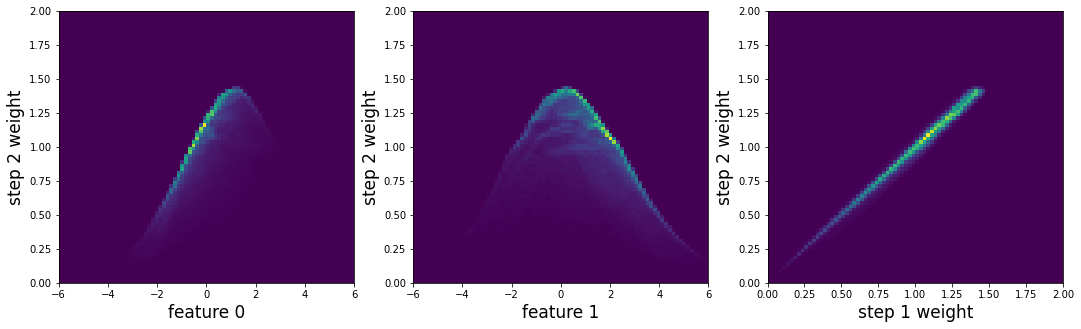

In [42]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))

hmin=-6
hmax=6
hbins=80

ax[0].hist2d( train_pts[:,0], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,2.]))

ax[1].hist2d( train_pts[:,1], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,2.]))

ax[2].hist2d( of_weights[3,0,:], of_weights[3,1,:], bins=[hbins,hbins], range=([0.,2.],[0.,2.]))


lfontsize = 17

ax[0].set_xlabel( 'feature 0', fontsize=lfontsize )
ax[0].set_ylabel( 'step 2 weight', fontsize=lfontsize )


ax[1].set_xlabel( 'feature 1', fontsize=lfontsize )
ax[1].set_ylabel( 'step 2 weight', fontsize=lfontsize )

ax[2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
ax[2].set_ylabel( 'step 2 weight', fontsize=lfontsize )


plt.show
